## Notebook for testing code and plots

This is a notebook where code is tested for the project in the Advanced Scientific Python Programming course. The code includes e.g. functions for two-dimensional Gaussian fitting and scripts for various visualizations of the fit. This type of analysis is applied to both generated data and to fluorescent dots in microscopy images. 
Last updated: 2021-02-22

## Testing Gaussian function plotting

In [55]:
x = np.linspace(0, 14, 15)
y = np.linspace(0, 14, 15)
im = np.array(np.meshgrid(x,y))
sigmax, sigmay = 2, 2
amp = 3
background = 10
x0, y0 = 7, 7

X, Y = np.meshgrid(x, y)
fit = amp*np.exp(-((X-x0)**2/(2*sigmax**2) + (Y-y0)**2/(2*sigmay**2)))+background

#fit.reshape(201,201)

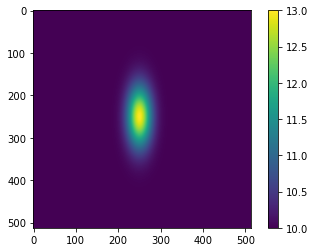

In [30]:
fig, ax = plt.subplots()
pos = ax.imshow(fit)
fig.colorbar(pos)

In [95]:
def plot_fit_projections(im, ax, ax_plotx, ax_ploty):
    # remove axis labels
    ax_plotx.tick_params(axis="x", labelbottom=False)
    ax_ploty.tick_params(axis="y", labelleft=False)

    # the 2D Gaussian fit plot
    ax.imshow(im)
    
    # plot projections of the Gaussian fit along the x and y axes
    ax_plotx.plot(fit.sum(axis=0)/fit.shape[0])
    ax_ploty.plot(fit.sum(axis=1)/fit.shape[1], np.arange(0, fit.shape[0]))
    

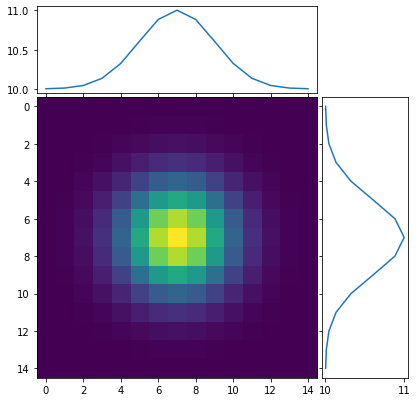

In [96]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.010 

rect_mid = [left, bottom, width, height]
rect_plotx = [left, bottom + height + spacing, width, 0.2]
rect_ploty = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(6, 6))

ax = fig.add_axes(rect_mid)
ax_plotx = fig.add_axes(rect_plotx, sharex=ax)
ax_ploty = fig.add_axes(rect_ploty, sharey=ax)

ax = plot_fit_projections(fit, ax, ax_plotx, ax_ploty)

plt.show()


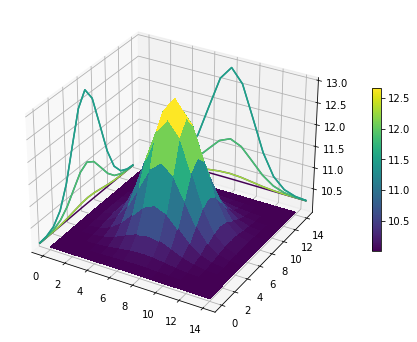

In [90]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(14,6))

# surface_plot with color grading and color bar for the Gaussian fit
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(X, Y, fit, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

# plot projections of the Gaussian fit along the x and y axes
cset = ax.contour(X, Y, fit, zdir='x', offset=-1, cmap=cm.viridis)
cset = ax.contour(X, Y, fit, zdir='y', offset=fit.shape[0]+1, cmap=cm.viridis)

## Testing Gaussian fitting

In [2]:
def gaussian2DFit(XY, x0, y0, sigmax, sigmay, amp, background):
    """Two-dimensional Gaussian function"""
    X, Y = XY 
    fit = amp*np.exp(-((X-x0)**2/(2*sigmax**2) + (Y-y0)**2/(2*sigmay**2)))+ background
    
    return fit.ravel()

In [3]:
x = np.linspace(0, 14, 20)
y = np.linspace(0, 14, 20)
X, Y = np.array(np.meshgrid(x,y))
fit = np.array(gaussian2DFit((X,Y), 7, 7, 4, 2, 10, 10))


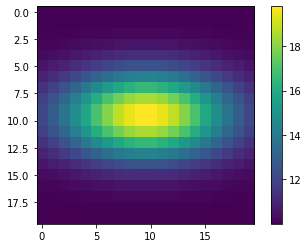

In [5]:
fig, ax = plt.subplots()
pos = ax.imshow(fit.reshape(20, 20))
fig.colorbar(pos)

In [37]:
#x = np.linspace(0, 14, 14)
#y = np.linspace(0, 14, 14)
#X, Y = np.array(np.meshgrid(x, y))
#im = np.vstack((X.ravel(), Y.ravel()))
#im_noise = im + 0.2*np.random.normal(size=im.size)

In [38]:
#curve_fit requires an independent variable with dimensions (2, M), XY in this case and dependent data with dimensions (1, M),
#which is fit_noise here

XY = np.vstack((X.ravel(), Y.ravel()))
fit_noise = fit + 0.2*np.random.normal(size=fit.size) #later switch this to an actual image, and image.ravel() for the fit

init_guess = np.array([7, 7, 4, 2, 10, 10])
# non-linear least squares fit of the 2D Gaussian
opt_param, cov_param = opt.curve_fit(gaussian2DFit, XY, fit_noise.ravel(), p0 = init_guess)

In [43]:
opt_param

array([ 6.97845528,  6.98036489,  4.01102846,  1.98832328, 10.08221696,
        9.99999717])

In [45]:
fit_opt = np.array(gaussian2DFit((X, Y), opt_param[0], opt_param[1], opt_param[2], opt_param[3], opt_param[4], opt_param[5]))

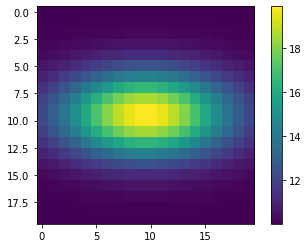

In [46]:
fig, ax = plt.subplots()
pos = ax.imshow(fit_opt.reshape(20, 20))
fig.colorbar(pos)

## Read images and apply the above fitting and plotting

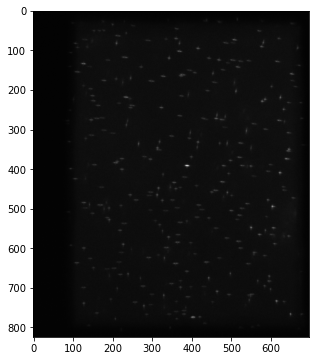

In [35]:
fig, ax = plt.subplots(figsize=(14,6))
im = plt.imread("./zStack_3D/img_125.tif")
ax.imshow(im[:, int(im.shape[1]/2):], cmap="gray")
#Image of fluorescent beads

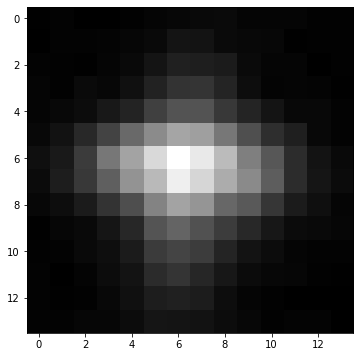

In [47]:
#pick out a specific fluorescent bead dot  
fig, ax = plt.subplots(figsize=(14,6))
im = plt.imread("./zStack_3D/img_121.tif")
x0, y0 = 1085, 392
ax.imshow(im[y0-7:y0+7, x0-7:x0+7] , cmap="gray")